<a href="https://colab.research.google.com/github/AdreyanDistor/Student-Survey-Analysis/blob/main/Student_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Team

*   Jonathan Darius
*   Ynah Novilla
*   Adreyan Distor
*   Ojasvi Godha





# Imports for Project

In [ ]:
pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3388 sha256=e4ee5962c378e05d097e3accc3980fe4db95ae79adee07bd9d2ad37f8e6d91e4
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import waterfall_chart

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CS105_F23_students/'
os.chdir(path)
os.listdir(path)

['Fall_23 CS105 Entrance Questionnaire.gform',
 'Labs',
 'Ox.gsheet',
 'CS105 Survey 2 (Appended Responses).gform',
 'CS105 Survey 2 (Appended Responses) (Responses).gsheet',
 'Copy of CS105 F23 Survey (10).gform',
 'Copy of CS105 F23 Survey (9).gform',
 'CS105 F23 Mini-project (Responses) - Form Responses 2.csv',
 'Copy of CS105 F23 Survey (8).gform',
 'Copy of CS105 F23 Survey (7).gform',
 'Copy of CS105 F23 Survey (6).gform',
 'Copy of CS105 F23 Survey (5).gform',
 'Copy of Copy of CS105 F23 Survey (4).gform',
 'Copy of Copy of CS105 F23 Survey (3).gform',
 'Copy of Copy of CS105 F23 Survey (2).gform',
 'Copy of responses.gsheet',
 'Copy of Copy of CS105 F23 Survey (1).gform',
 'Copy of CS105 F23 Survey (4).gform',
 '56.ipynb',
 'Copy of CS105 F23 Survey (3).gform',
 'CS105 F23 Mini-project (Responses).gsheet',
 'Copy of CS105 F23 Survey (2).gform',
 'Copy of Copy of CS105 F23 Survey.gform',
 'CS105 F23 Survey.gform',
 'Mini Project Lab 5-6.gsheet',
 'Copy of CS105 F23 Survey (1).gf

# ***Question 1: What Data Do We Have***

For our project we are taking questions from a survey that asks a wide variety of questions about people's interests like Academic Performance, Music Taste, Gym Routine, Social Media, and much more. Our question though isn't reliant upon much of this data, rather we are focusing on the data pretaining to people's answers to the questions about music and how it correlates with their Computer Science work, or academic performance.

---



In [ ]:
project_df = pd.read_csv('CS105 F23 Mini-project (Responses) - Form Responses 2.csv')
project_df.head()

,Timestamp,What class are you filling out this survey for? Select all that apply.,What is your current class standing?,What is your gender?,How many languages do you know?,How much free time do you have per day?,"How many hours per week do you socialize with friends outside of class? (i.e. studying, eating, exercising, lounging, etc.)",How much do you agree with the following statement: I enjoy meeting new people.,Do you currently have a job?,"If you have a job, how much do you work per week?",...,What is your current living situation?,"If you live off-campus, how many minutes does it take for you to commute to school on average?",What favorite method of transportation do you use when traversing the campus?,What was your first programming language?,Around what grade did you learn your first programming language?,What's your most commonly used language?,What is your reason for using that language most frequently?,How many lines of code do you write every week with this language?,What CS-related field do you prefer?,What is your least favorite part of Computer Science?
0,11/3/2023 15:26:42,CS105,Senior,Male,2,2-3hrs,10-15 hours,3.0,No,NaN,...,On-Campus Apartment,<10 min,Walking,Python,9-12th grade,Python,Language is helpful with built-in functions,50-100,Hardware/Embedded Systems,Game Development
1,11/3/2023 15:30:11,CS105,Junior,Male,2,3-4hrs,0-5 hours,3.0,No,NaN,...,Off-Campus Housing in Riverside,20-30 min,Walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/3/2023 15:31:28,CS105,Senior,Female,3,3-4hrs,0-5 hours,4.0,Yes,Between 5-10 hours,...,On-Campus Apartment,NaN,Walking,C++,College,Python,Language is simplified,<50,Artificial Intelligence/Machine Learning,Hardware/Embedded Systems
3,11/3/2023 15:31:45,CS105,Junior,Male,2,3-4hrs,0-5 hours,2.0,Yes,Between 5-10 hours,...,Off-Campus Housing outside of Riverside,30-60 min,Walking,C++,9-12th grade,C++,Syntax,<50,Game Development,Artificial Intelligence/Machine Learning
4,11/3/2023 15:32:06,CS111,Senior,Male,4+,2-3hrs,10-15 hours,4.0,No,NaN,...,Off-Campus Housing in Riverside,20-30 min,Walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

# ***Question 2: What We Want To Know About This Data***

When looking at the data, we first want to know what type of music people listen to, whether they listen to it while they do their homework, and even if they play an instrument. Second, we want to know where the people in sample are in terms of their own academic performance and their preferences for when it comes to Computer Science related fields. We want to see if there is any correlation between the samples involvment in Music and their preferences/performance in the area of Computer Science.

---



In [ ]:
questions = project_df.columns

qs = list(questions)
qs

wanted_questions = []

wanted_questions.append("What is your current class standing?")
wanted_questions.append("What is your gender?")
wanted_questions.append("What is your GPA?")
wanted_questions.append("What is your current class standing?")
wanted_questions.append("What is your major?")
wanted_questions.append("Why did you choose to major in this field? Select all that apply.")
wanted_questions.append("What is your favorite area of Computer Science?")
wanted_questions.append("How many Computer Science related events (e.g., hackathons, programming competitions, etc.) have you been to since Fall 2022?")
wanted_questions.append("How do you perceive your overall performance in math and science courses?")
wanted_questions.append("Do you listen to music while you do homework? ")
wanted_questions.append("Which of the following genres do you listen to the majority of the time? ")
wanted_questions.append("How many years have you been involved with music (playing instruments, singing, composing, etc.)?")
wanted_questions.append("Do you think that the mental processes involved in music (e.g., rhythm, pattern recognition) are related to those in math and science?")
wanted_questions.append("Do you play an instrument?")
wanted_questions.append("If you play an instrument, what instrument do you play?")
wanted_questions.append("What CS-related field do you prefer?")
wanted_questions.append("What is your least favorite part of Computer Science?")

wanted_questions

['What is your current class standing?',
 'What is your gender?',
 'What is your GPA?',
 'What is your current class standing?',
 'What is your major?',
 'Why did you choose to major in this field? Select all that apply.',
 'What is your favorite area of Computer Science?',
 'How many Computer Science related events (e.g., hackathons, programming competitions, etc.) have you been to since Fall 2022?',
 'How do you perceive your overall performance in math and science courses?',
 'Do you listen to music while you do homework? ',
 'Which of the following genres do you listen to the majority of the time? ',
 'How many years have you been involved with music (playing instruments, singing, composing, etc.)?',
 'Do you think that the mental processes involved in music (e.g., rhythm, pattern recognition) are related to those in math and science?',
 'Do you play an instrument?',
 'If you play an instrument, what instrument do you play?',
 'What CS-related field do you prefer?',
 'What is your 

In [ ]:
cleaned_df = project_df

In [ ]:
for i in cleaned_df.columns:
  if i not in wanted_questions:
    del project_df[i]

list(cleaned_df.columns)

['What is your current class standing?',
 'What is your gender?',
 'What is your GPA?',
 'What is your major?',
 'Why did you choose to major in this field? Select all that apply.',
 'What is your favorite area of Computer Science?',
 'How do you perceive your overall performance in math and science courses?',
 'Do you listen to music while you do homework? ',
 'Which of the following genres do you listen to the majority of the time? ',
 'How many years have you been involved with music (playing instruments, singing, composing, etc.)?',
 'Do you think that the mental processes involved in music (e.g., rhythm, pattern recognition) are related to those in math and science?',
 'Do you play an instrument?',
 'If you play an instrument, what instrument do you play?',
 'What CS-related field do you prefer?',
 'What is your least favorite part of Computer Science?']

In [ ]:
#Right now we want to clean the data to make sure we want what we need and that there is less noise in our data

df = cleaned_df
df.columns = ['Class_Standing', 'Gender', 'GPA', 'Major', 'Why_Major','Fav_Area','Perceived_Performance','Music&HW','Preferred_Genre','Music_Years', 'Music&Mental', 'Play_Instrument' ,'Instrument','Preferred_CS_Field','Least_Fav_Area']
df.loc[:,'Music_Years'] = cleaned_df.loc[:,'Music_Years'].fillna(0)
df.loc[:,'GPA'] = cleaned_df.loc[:,'GPA'].fillna(0)
df.loc[:,'Perceived_Performance'] = cleaned_df.loc[:,'Perceived_Performance'].fillna(0)

df.loc[df['Major'].str.lower().str.find('computer science') != -1, 'Major'] = 'CS'
df.loc[df['Major'].str.lower().str.find('computer science') != -1, 'Major'] = 'CS'
df.loc[df['Major'].str.lower().str.find('csba') != -1, 'Major'] = 'CS'
df.loc[df['Major'].str.lower().str.find('encs') != -1, 'Major'] = 'CS'
df.loc[df['Major'].str.lower().str.find('data science') != -1, 'Major'] = 'DS'
df.loc[df['Major'].str.lower().str.find('dtse') != -1, 'Major'] = 'DS'

df.loc[df['Major'].str.lower().str.find('dtse') != -1, 'Major'] = 'DS'
df['Instrument'] = df['Instrument'].str.replace('None','NaN')

df['Preferred_Genre'] = df['Preferred_Genre'].str.replace('None','NaN')
df['Music_Years'] = df['Music_Years'].str.replace('Seven', '7', regex=True)

#Strings to integers Music_Years
df['Music_Years'] = df['Music_Years'].str.replace('[^0-9.]', '', regex=True)
df.loc[df['Music_Years'] == '', 'Music_Years'] = '0'

df['Music_Years'] = df['Music_Years'].fillna('0').astype(float)
df.loc[df['Preferred_CS_Field'].str.find('AI') != -1, 'Preferred_CS_Field'] = 'Artificial Intelligence/Machine Learning'
df.loc[df['Least_Fav_Area'].str.find('AI') != -1, 'Preferred_CS_Field'] = 'Artificial Intelligence/Machine Learning'


df.loc[df['Major'] == 'DS', 'Major'] = 'Data Science'
df.loc[df['Major'] == 'CS', 'Major'] = 'Computer Science'
df.loc[df['Music&HW'].isnull() == True, 'Music&HW'] = 'No'

print(df.to_string())

   Class_Standing      Gender      GPA                           Major                                                                                                                                                                                         Why_Major                                                              Fav_Area  Perceived_Performance   Music&HW                            Preferred_Genre  Music_Years    Music&Mental Play_Instrument                       Instrument                        Preferred_CS_Field                            Least_Fav_Area
0          Senior        Male  3.0-3.5                Computer Science                                                                                                         The topics are interesting, Job market is in high-demand, I am passionate about the field                                                  Software Development                    4.0        Yes                                       Rock          0.0  



---



# ***Question 3: Our Data Exploration***





---



In [ ]:
GPA_Percieved = pd.crosstab(df['GPA'], df['Perceived_Performance'])
GPA_Percieved

Perceived_Performance,0.0,2.0,3.0,4.0,5.0
GPA,,,,,
0,2,0,0,0,0
2.0-2.5,0,0,1,0,0
2.5-3.0,0,2,6,2,1
3.0-3.5,0,1,15,24,2
3.5-4.0,0,0,8,23,13


<Axes: xlabel='Perceived_Performance', ylabel='GPA'>

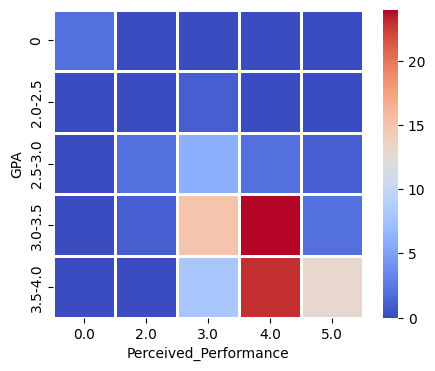

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(GPA_Percieved, cmap="coolwarm", linewidths=2)

**Observation:** When first looking at the data, we can compare the gpa and the perceived performance in stem classes to see if there are any discrepancies in their official gpa and their reported perceived performance. When comparing the results on the heatmap with the table, we can see that there is a higher concentration of people with higher GPA and Perceived Performance. This means that the data is aligining how we want it to and the metrics seem to match up. The heat map shows visually that most of the sample have both higher GPA and higher perceived performance in general

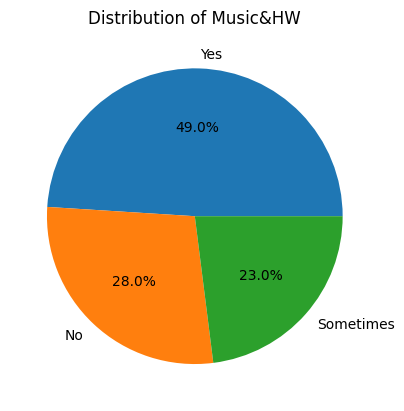

In [ ]:
new_df = df.copy()
plt.pie(new_df['Music&HW'].value_counts(), labels=new_df['Music&HW'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Music&HW')
plt.show()


**Observation:** The given pie chart displays the distribution of students that listen to music as they do homework. We can see that the majority of students do listen to music while the rest are evenly divided between not listening at all and listening to music sometimes.

Text(0.5, 1.0, 'GPA Based on Listening to Music While doing HW')

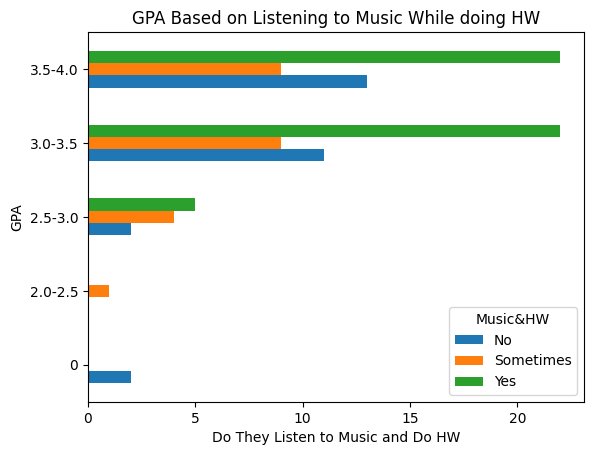

In [ ]:
new_df = df[df['Music&HW']!= 'NaN'].copy()
new_table = pd.crosstab(new_df['GPA'], new_df['Music&HW'])


new_table.plot(kind='barh')
plt.xlabel('Do They Listen to Music and Do HW')
plt.ylabel('GPA')
plt.title('GPA Based on Listening to Music While doing HW')

**Observation:** When looking at the bar graph, we can see that as the GPA increases, both the amount of people who listen to music and don’t listen to music start to increase. We can also observe that the amount of people who DO listen to music while they do their homework is nearly double than those who don’t listen to music. We can see from this data that more people listen to music than those who do not listen to music. However, like the previous graph, we cannot make any conclusions on correlation or affect that music as on GPA because this simply displays the count of students that fall into each category

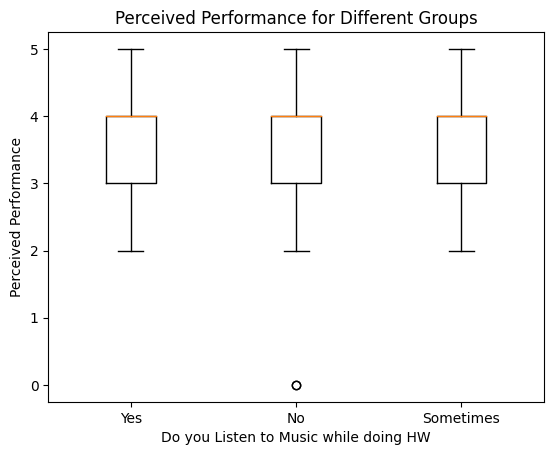

In [ ]:
new_df = df.copy()
yes_plot = new_df[new_df['Music&HW'] == 'Yes']
no_plot = new_df[new_df['Music&HW'] == 'No']
sometimes_plot = new_df[new_df['Music&HW'] == 'Sometimes']

data = [yes_plot["Perceived_Performance"], no_plot["Perceived_Performance"], sometimes_plot["Perceived_Performance"]]
labels = ['Yes', 'No', 'Sometimes']

plt.boxplot(data, labels=labels)
plt.xlabel('Do you Listen to Music while doing HW')
plt.ylabel('Perceived Performance')
plt.title('Perceived Performance for Different Groups')
plt.show()


**Observation:** For this graphic, we decided to compare Perceived Performance and whether or not they listen to music. Each of the 3 box plots seem to be identical, except for the middle box plot that has a minimum value 0 (*this data point is relating to someone who did not respond to any questions pretaining to their academic performance*). In terms of the Interquartile ranges, they all seem to fall into the same amount of perceived performance amongst the “Yes”, “No”, “Sometimes” options. The maximum ranges all seem to be the same as well.

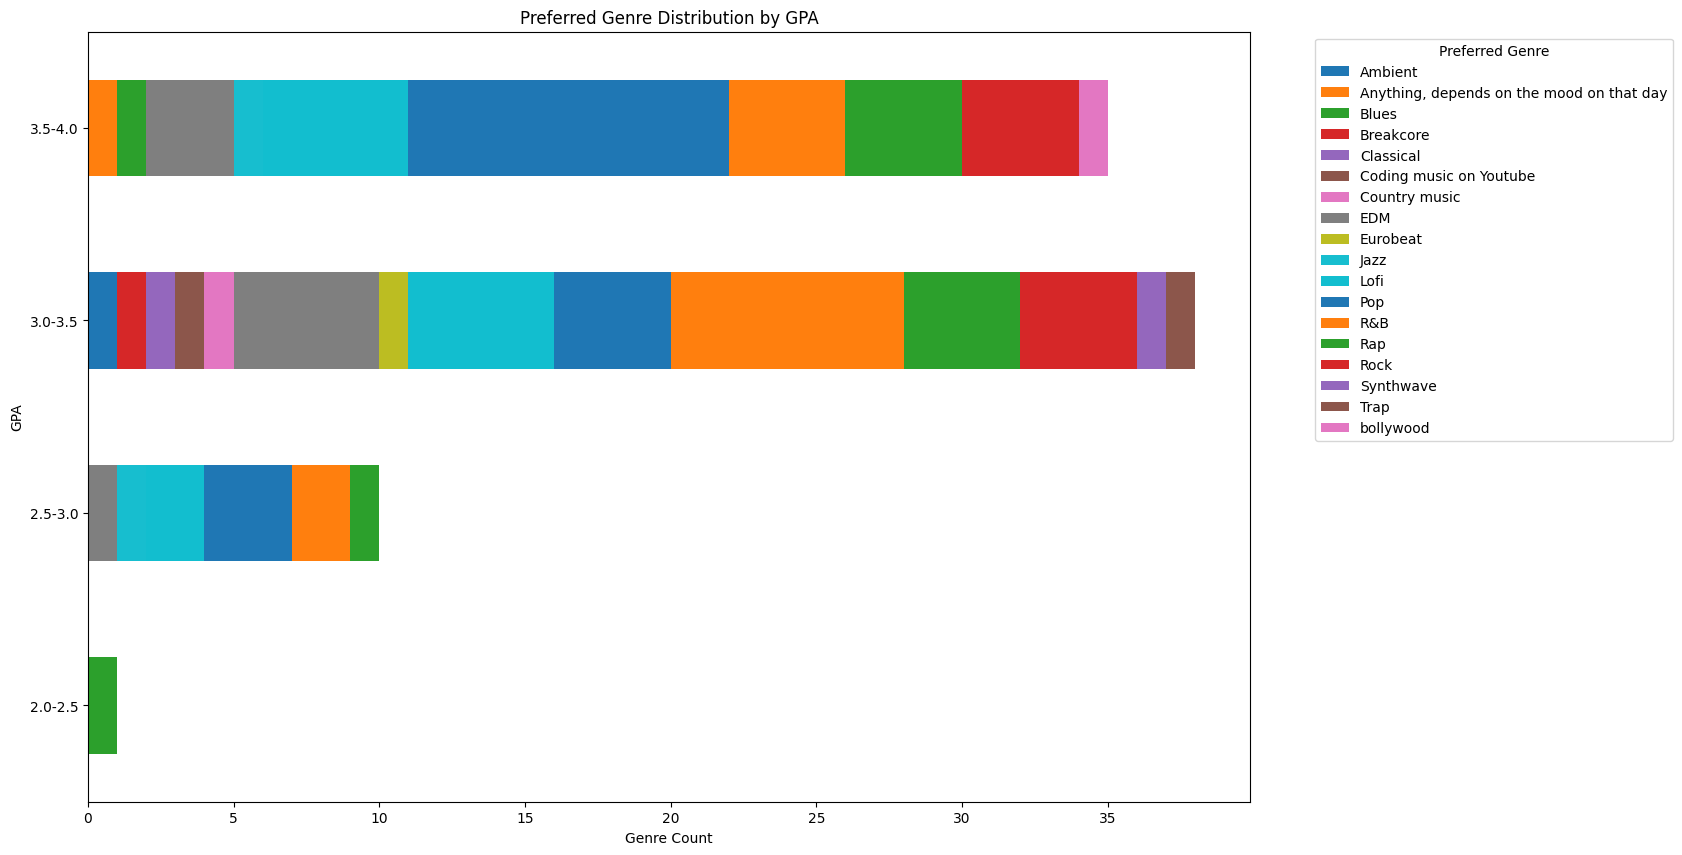

In [ ]:
new_df = df[df['Preferred_Genre']!= 'NaN'].copy()

new_table = pd.crosstab(new_df['GPA'], new_df['Preferred_Genre'])

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#12becf']
fig, ax = plt.subplots(figsize=(15, 10))
new_table.plot(kind='barh', stacked=True, ax=ax, color=colors)

plt.xlabel('Genre Count')
plt.ylabel('GPA')
plt.title('Preferred Genre Distribution by GPA')

plt.legend(title='Preferred Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Observation:** This stacked bar graph shows the different preferred genres student listen to based on their GPA. With this we can see the types of music that appear most in each GPA section. For example, in the GPA group 3.5-5 pop is most common, but in the 3-3.5 section, R&B has the highest value. On the other hand, there is not much data that can be used from the this graph becuase this graph simply diplays the count of different genres in a given GPA section, we cannot make any assumptions on performance or correlation with this data.

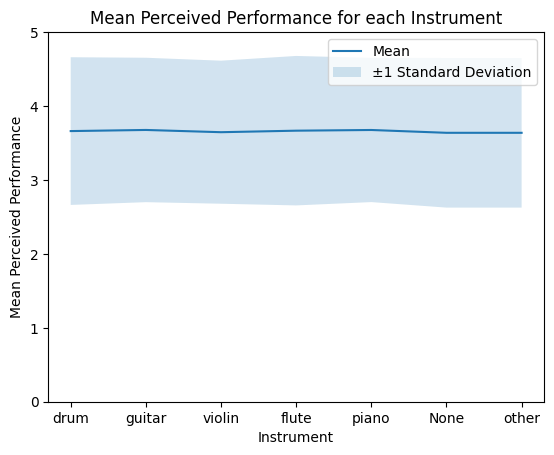

In [ ]:
instrument_df = df.copy()

instruments = ['drum', 'guitar', 'violin', 'flute', 'piano', 'None','other']
means = {}
std = {}
for instrument in instruments:
    if instrument is None:
        current_df = new_df[new_df['Instrument'].isnull()]
    else:
        current_df = new_df[new_df['Instrument'].str.lower().str.find(instrument) != -1]

    means[instrument] = current_df['Perceived_Performance'].mean()
    std[instrument] = np.std(current_df['Perceived_Performance'])
means = pd.DataFrame.from_dict(means, orient='index', columns=['Mean_Perceived_Performance']).reset_index()
std = pd.DataFrame.from_dict(std, orient='index', columns=['StandardDeviation_Perceived_Performance']).reset_index()

means.columns = ['Instrument', 'Mean_Perceived_Performance']
plt.plot(means['Instrument'], means['Mean_Perceived_Performance'], label = 'Mean')
plt.fill_between(means['Instrument'],means['Mean_Perceived_Performance'] - std['StandardDeviation_Perceived_Performance'],
                 means['Mean_Perceived_Performance'] + std['StandardDeviation_Perceived_Performance'],alpha=0.2, label='±1 Standard Deviation')
plt.xlabel("Instrument")
plt.ylabel("Mean Perceived Performance")
plt.title("Mean Perceived Performance for each Instrument")
plt.ylim(bottom = 0, top = 5)
plt.legend()
plt.show()


**Observation:** In this visualization, we wanted to compare the Mean Perceived Performance and the different types of instruments. A surprising statistic is that amongst all of the instruments we see that the mean perceived performance is between 3.5 and 4, with a standard deviation of plus or minus 1. This shows the relationship between the mean of the perceived performance and how it relates amongst all of the instruments that people play.

In [ ]:
major_proportions = new_df.pivot_table(index='Major', columns='Music&HW', aggfunc='size', fill_value=0).divide(new_df.groupby('Major').size(), axis=0)



computerscience = new_df['Major'].value_counts()/len(new_df)
major_proportions

Music&HW,No,Sometimes,Yes
Major,,,
Biochemistry,0.000000,0.000000,1.000000
Biology,0.000000,1.000000,0.000000
Business,0.000000,0.000000,1.000000
Computer Engineering,0.500000,0.000000,0.500000
Computer Science,0.333333,0.235294,0.431373
Data Science,0.166667,0.222222,0.611111
Mathematics,1.000000,0.000000,0.000000
Psychology,0.000000,0.000000,1.000000
Telecommunications engineering,0.000000,1.000000,0.000000


In [ ]:
computerscience

Computer Science                  0.525773
Data Science                      0.371134
Computer Engineering              0.020619
Psychology                        0.010309
Telecomunications Systems         0.010309
Biochemistry                      0.010309
Business                          0.010309
neuroscience                      0.010309
Biology                           0.010309
Mathematics                       0.010309
Telecommunications engineering    0.010309
Name: Major, dtype: float64

<ipython-input-19-3d47b41ed6a1>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


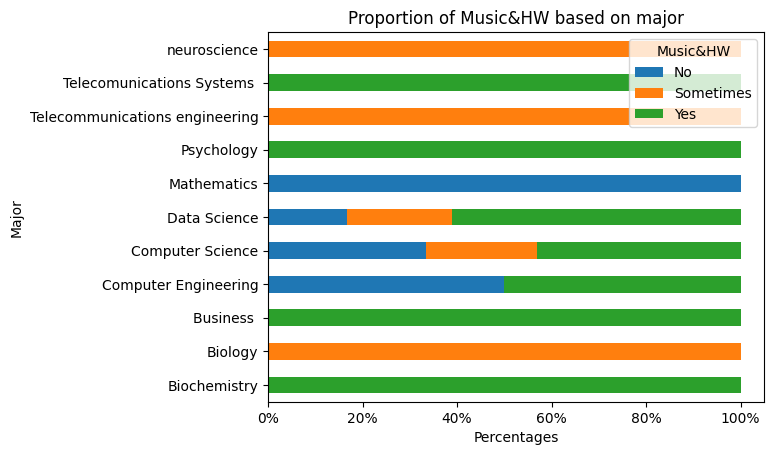

In [ ]:
ax = major_proportions.plot(kind='barh', color=colors, stacked=True)

ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
ax.set_xlabel('Percentages')

plt.ylabel('Major')
plt.title('Proportion of Music&HW based on major')
plt.show()


**Observation:** For this visualization we wanted to show the proportion of who listens to music while they do their homework compared to different majors. Each value on the graph corresponds to the percentage of participants in a given major. When first looking at the graph, we can see that ~16% of Data Science participants don't listen to music while doing homework, while ~61% prefer to listen to music while doing homework. When looking at the Data Science portion, we can see that Neurosciencem, Telecomunications Engineering, and Biology majors, don't listen to music. This is due to the fact each of tehse majors only make up, 1% of the total participants. The two largest groups of participants do not share a similar percentage. However, the majority of both groups listen to music while doing homework

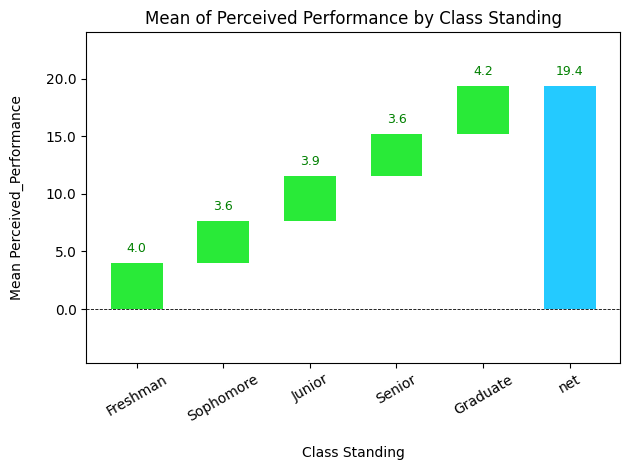

In [ ]:
new_df = df.copy()


grade_order = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Graduate']

chart = pd.DataFrame()
chart['Perceived_Performance'] = new_df['Perceived_Performance']
chart['Class_Standing'] = pd.Categorical(new_df['Class_Standing'], categories=grade_order, ordered=True)

grouped_chart = chart.groupby('Class_Standing')['Perceived_Performance'].mean().reset_index(name='Perceived_Performance')

waterfall_chart.plot(grouped_chart['Class_Standing'], grouped_chart['Perceived_Performance'], Title="Mean of Perceived Performance by Class Standing", x_lab="Class Standing", y_lab="Mean Perceived_Performance")

plt.show()

In [ ]:
average = 19.4/5
average

**Observation:** Given this waterfall chart, we can see that at the Freshman Standing we have a mean perceived performance of 4.0, Sophomore we have 3.6, Junior we have 3.9, Senior we have 3.6, finally at the graduate level we have 4.2. At the very end we have the net summary of all the mean values, but if we use this to calculate the average mean value we get an average mean of 3.88 in overall perceived performance. We can say that the “typical” mean perceived performance is 3.88 which gives us insight to how the sample feels about their performance regardless of whether or not they listen to music or not.

<Axes: xlabel='Perceived_Performance', ylabel='Major'>

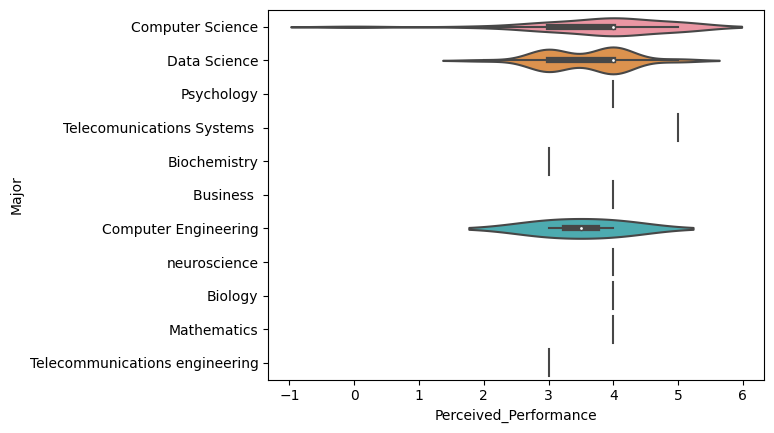

In [ ]:
new_df = df.copy()
sns.violinplot(x = new_df["Perceived_Performance"], y= new_df['Major'])

**Observation:** In this graph we are showing the comparison between the samples' majors and also their percieved performance. We depict this using violin chart, the black bar in the middle shows the quartile range (i.e. the variance), the width of the violin shape indicates frequency. The white dot indicates the mean value of percieved perforamcne and the straight black line indicates that there is only one particpant of that major and it shows their percieved score. When looking at computer science we can see that the percieved performance varies between 3 and 4 and the same applies to Data Science majors. The mean percieved performance is 4 for all majors except, Telecommunication systems, Biochemistry, Comp E, and Telecommunications engineering. A suprising finding is that there is a higher frequency of participants with a mean percieved performance of 4, for Data Science Majors, while the frequency is lower for computer science majors. There is also a relativley high frequency of those of a percieved performance of 3 for data science majors. Another thing to point out is that someone that didn't disclose any of their academic data set their percieved performance to 0, which in turn dragged the violin plot.

# ***Question 4 & 5: Our Hypotheses***



1.   **Hypothesis #1:**




**Our Hypothesis:** We belive that there is a correlation between the type of music you listen to and your favorite area of computer science

**Null Hypothesis:** There is no correlation between the type of music people listen to and their favorite area of computer science. They are independent of one another.

In [ ]:
df_woNAN = df[df['Preferred_Genre'] != 'NaN']

fieldAndMusicTable = pd.crosstab(df_woNAN['Preferred_CS_Field'], df_woNAN['Preferred_Genre'])
fieldAndMusicTable
coeffMatrix = fieldAndMusicTable.corr()
coeffMatrix


Preferred_Genre,Ambient,"Anything, depends on the mood on that day",Blues,Breakcore,Classical,Coding music on Youtube,Country music,EDM,Eurobeat,Jazz,Lofi,Pop,R&B,Rap,Rock,Synthwave,Trap,bollywood
Preferred_Genre,,,,,,,,,,,,,,,,,,
Ambient,1.000000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,-0.177705,-0.200000,6.324555e-01,0.516398,-2.259731e-01,-0.063246,0.069843,-0.433861,-0.200000,-0.200000,-0.200000
"Anything, depends on the mood on that day",-0.200000,1.000000,1.000000,-0.200000,1.000000,1.000000,1.000000,0.888523,1.000000,6.324555e-01,0.516398,2.259731e-01,0.695701,0.069843,0.542326,-0.200000,-0.200000,1.000000
Blues,-0.200000,1.000000,1.000000,-0.200000,1.000000,1.000000,1.000000,0.888523,1.000000,6.324555e-01,0.516398,2.259731e-01,0.695701,0.069843,0.542326,-0.200000,-0.200000,1.000000
Breakcore,-0.200000,-0.200000,-0.200000,1.000000,-0.200000,-0.200000,-0.200000,-0.177705,-0.200000,-3.162278e-01,-0.258199,-2.259731e-01,-0.442719,-0.349215,0.216930,1.000000,1.000000,-0.200000
Classical,-0.200000,1.000000,1.000000,-0.200000,1.000000,1.000000,1.000000,0.888523,1.000000,6.324555e-01,0.516398,2.259731e-01,0.695701,0.069843,0.542326,-0.200000,-0.200000,1.000000
Coding music on Youtube,-0.200000,1.000000,1.000000,-0.200000,1.000000,1.000000,1.000000,0.888523,1.000000,6.324555e-01,0.516398,2.259731e-01,0.695701,0.069843,0.542326,-0.200000,-0.200000,1.000000
Country music,-0.200000,1.000000,1.000000,-0.200000,1.000000,1.000000,1.000000,0.888523,1.000000,6.324555e-01,0.516398,2.259731e-01,0.695701,0.069843,0.542326,-0.200000,-0.200000,1.000000
EDM,-0.177705,0.888523,0.888523,-0.177705,0.888523,0.888523,0.888523,1.000000,0.888523,5.619515e-01,0.688247,5.688833e-01,0.842927,0.434400,0.770991,-0.177705,-0.177705,0.888523
Eurobeat,-0.200000,1.000000,1.000000,-0.200000,1.000000,1.000000,1.000000,0.888523,1.000000,6.324555e-01,0.516398,2.259731e-01,0.695701,0.069843,0.542326,-0.200000,-0.200000,1.000000


<Axes: xlabel='Preferred_Genre', ylabel='Preferred_Genre'>

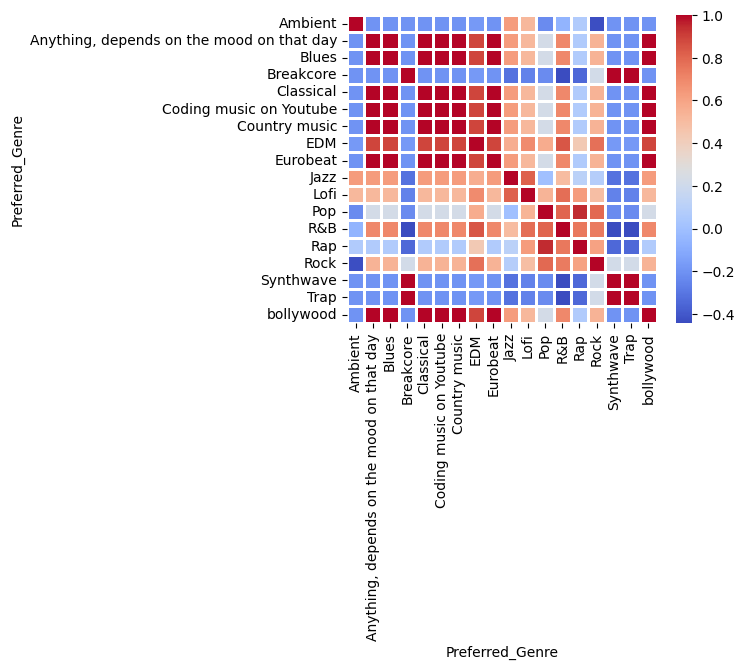

In [ ]:
# Create the heatmap to visualize the correlation matrix

plt.figure(figsize=(5, 4))
sns.heatmap(coeffMatrix, cmap="coolwarm", linewidths=2)
# sns.heatmap(fieldAndMusicTable, cmap="coolwarm", linewidths=2)



2.   **Hypothesis #2:**




**Our Hypothesis:** There is a correlation between GPA and whether or not they play an instrument.

**Null Hypothesis:** There is no correlation between GPA and whether or not they play an instrument. They are independent from one another.

In [ ]:
df_wo0 = df[df['GPA'] != '0']
df_woNAN = df[df['Play_Instrument'] != 'NaN']

gpa_instrument_table = pd.crosstab(df_wo0['GPA'], df_woNAN['Play_Instrument'])
gpa_instrument_table

Play_Instrument,No,Yes
GPA,,
2.0-2.5,0,1
2.5-3.0,8,3
3.0-3.5,23,16
3.5-4.0,24,18


**(i)** The test I will be using is Chi Squared Analysis. Chi Squared Analysis will help indicate whether or not there IS a correlation and to see if our hypothesis holds.

In [ ]:
#(ii) Performing the Analysis
chi2, p, dof, expected = chi2_contingency(gpa_instrument_table)

# Display the results
print("\nChi-squared Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


Chi-squared Statistic: 2.3575285958061074
P-value: 0.5015896219883991
Degrees of Freedom: 3


In [ ]:
print("Given the degree of freedom of 3, with a significance level of 0.5015896219883991, our chi squared value should be above:")

Given the degree of freedom of 3, with a significance level of 0.5015896219883991, our chi squared value should be above:


In [ ]:
from scipy.stats import chi2_contingency, chi2
chi2.ppf(0.5015896219883991, 3)

2.3744398120911736

**Our Observation:** Given that our chi squared value of 2.3575285958061074 scores below our threshold value of 0.5015896219883991, we reject our hypothesis. This means that there is NO correlation between students who play instruments and their GPA. Those variables are independent from one another.





3.   **Hypothesis #3:**

**Our Hypothesis**: There is a correlation between percieved overall performance and those who listen to music while they do their homework.

**Null Hypothesis**: There is no correlation between percieved performance and those who listen to music while they do their homework. They are independent from one another.



In [ ]:
perceivedPerformace_HW_table = pd.crosstab(df['Perceived_Performance'], df['Music&HW'])
perceivedPerformace_HW_table

Music&HW,No,Sometimes,Yes
Perceived_Performance,,,
0.0,2,0,0
2.0,1,1,1
3.0,6,8,16
4.0,13,13,23
5.0,6,1,9


**(i)** The test I will be using is Chi Squared Analysis. Chi Squared Analysis will help indicate whether or not there IS a correlation and to see if our hypothesis holds.

In [ ]:
#(ii) Performing the Analysis
chi2, p, dof, expected = chi2_contingency(perceivedPerformace_HW_table)

# Display the results
print("\nChi-squared Value:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


Chi-squared Value: 9.42384362795695
P-value: 0.3078113270342382
Degrees of Freedom: 8


In [ ]:
print("Given the degree of freedom of 6, with a significance level of 0.6603925485744833, our chi squared value should be above:")

Given the degree of freedom of 6, with a significance level of 0.6603925485744833, our chi squared value should be above:


In [ ]:
from scipy.stats import chi2_contingency, chi2
chi2.ppf(0.6603925485744833, 6)

6.801373325168482

**Our Observation:** Given that our chi squared value of 4.120358188252812 scores below our threshold value of 6.801373325168482, we reject our hypothesis. This means that there is NO correlation between students' percieved performance and their GPA. Those variables are independent from one another.



---



# ***Overall Conclusion:***

---



We analyzed a lot of different aspects with the data we collected from the data we collected. In our data exploration, we gathered that the majority of students do listen to music while they do homework, however there doesn't seem to be a direct correlation between whether they listen to music and their performance in classes, nor is their any correlation between listening to music and how students feel about their own performance. There also wasn't any correlation between preferred genres of music to listen while working and GPA. We did find, however, that the data proves the assumption that people with higher GPA seem to have more confidence in their performance.

For our 3 hypothesis, after testing our data, we have determined that there is no correlation between preferred CS field and preferred music genre, between GPA and whether they played an instrument, nor between students' percieved performance and their GPA.